# TUGAS - Support Vector Machine

<b>IDENTITAS</b>

NIM: **2041720080**

Nama: **ELVIRA SANIA MUFIDA** <br>
Kelas: **TI-3G**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC

In [16]:
path = '/content/drive/MyDrive/Colab Notebooks/DataSet/P7/gaji.csv'
df = pd.read_csv(path)
df

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [32]:
gaji = df['Gaji']
gaji_above_80k = df[(df['Gaji'] > 80000)]
gaji_under_80k = df[(df['Gaji'] <= 80000)]

print(gaji_above_80k, '\n')
print(gaji_under_80k)
print(np.array(gaji > 80000))

            Posisi  Level     Gaji  Bool
4  Country Manager      5   110000     1
5   Region Manager      6   150000     1
6          Partner      7   200000     1
7   Senior Partner      8   300000     1
8          C-level      9   500000     1
9              CEO     10  1000000     1 

              Posisi  Level   Gaji  Bool
0   Business Analyst      1  45000     0
1  Junior Consultant      2  50000     0
2  Senior Consultant      3  60000     0
3            Manager      4  80000     0
[False False False False  True  True  True  True  True  True]


In [19]:
df.insert(3, "Bool", np.array(gaji > 80000), True)
df

,Posisi,Level,Gaji,Bool
0,Business Analyst,1,45000,False
1,Junior Consultant,2,50000,False
2,Senior Consultant,3,60000,False
3,Manager,4,80000,False
4,Country Manager,5,110000,True
5,Region Manager,6,150000,True
6,Partner,7,200000,True
7,Senior Partner,8,300000,True
8,C-level,9,500000,True
9,CEO,10,1000000,True


In [33]:
probX = gaji_above_80k['Gaji'].count() / gaji.count()
probY = gaji_under_80k['Gaji'].count() / gaji.count()

print('Gaji > 80K  : ', probX)
print('Gaji >= 80K : ', probY)

Gaji > 80K  :  0.6
Gaji >= 80K :  0.4


[0 0 0 0]


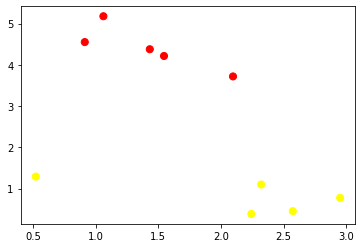

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_blobs
df['Bool'] = LabelEncoder().fit_transform(df['Bool'])

X1 = df[(df['Bool'] == 0)]['Bool'].values
X2 = df[(df['Bool'] == 1)]['Bool'].values
y = gaji.values
y1 = gaji_above_80k['Gaji'].values
y2 = gaji_under_80k['Gaji'].values

print(X1)
X, y = make_blobs(n_samples=gaji.count(), centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

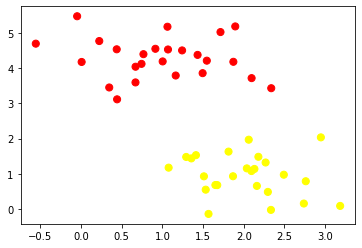

In [36]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

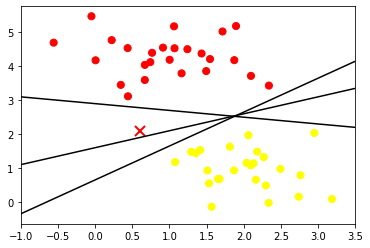

In [37]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

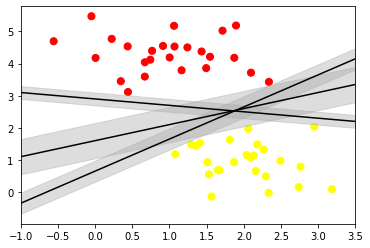

In [38]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [39]:
X = df[['Gaji','Level','Bool']]
y = df['Posisi']

In [40]:
	
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
from sklearn import svm
#menggunakan SVM library untuk membuat SVM classifier
classifier = svm.SVC(kernel = 'linear')
 
#memasukkan training data kedalam classifier
classifier.fit(X_train, y_train)
 
#memasukkan testing data ke variabel y_predict
y_predict = classifier.predict(X_test)
 
#menampilkan classification report
print(classification_report(y_test, y_predict))

                 precision    recall  f1-score   support

        C-level       0.00      0.00      0.00       1.0
Country Manager       0.00      0.00      0.00       1.0
        Manager       0.00      0.00      0.00       0.0
 Senior Partner       0.00      0.00      0.00       0.0

       accuracy                           0.00       2.0
      macro avg       0.00      0.00      0.00       2.0
   weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Text(69.0, 0.5, 'Gaji')

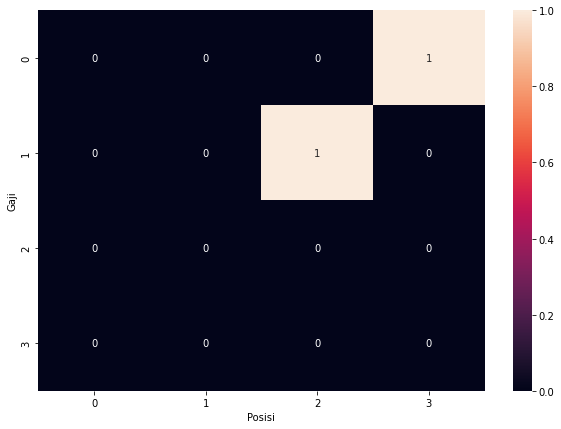

In [42]:
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
cm = confusion_matrix(y_test, y_predict)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Posisi')
plt.ylabel('Gaji')